In [104]:
# Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lm
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import plot_confusion_matrix
from six import StringIO  
from IPython.display import Image  

In [36]:
# Load Dataset
df = read_csv("C:/Users/Shyam/Downloads/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
# Summary Of The Data
# Shape 
print(df.shape)

# Descriptions
print(df.describe())

(768, 9)
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000         

In [38]:
# Clean The Dataset
# Check For Missing Values
for column in df.columns:
    pct_missing = np.mean(df[column].isnull())
    print('{} - {}%'.format(column, round(pct_missing*100)))

Pregnancies - 0.0%
Glucose - 0.0%
BloodPressure - 0.0%
SkinThickness - 0.0%
Insulin - 0.0%
BMI - 0.0%
DiabetesPedigreeFunction - 0.0%
Age - 0.0%
Outcome - 0.0%


In [39]:
# Rename Columns
new_names = {'BloodPressure' : 'BP',
             'SkinThickness' : 'Skin',
             'DiabetesPedigreeFunction' : 'Pedigree'}
df.rename(columns=new_names, inplace=True)

df.head()

,Pregnancies,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


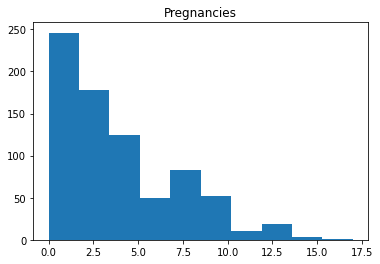

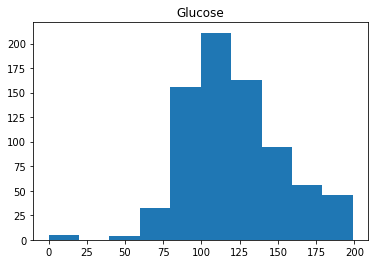

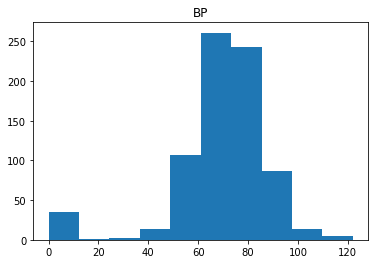

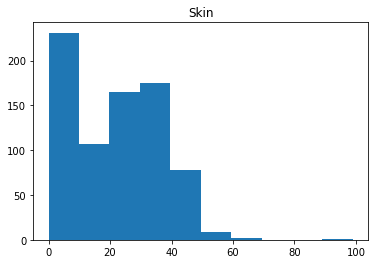

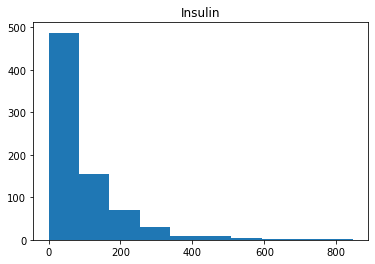

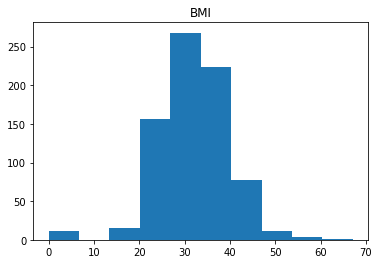

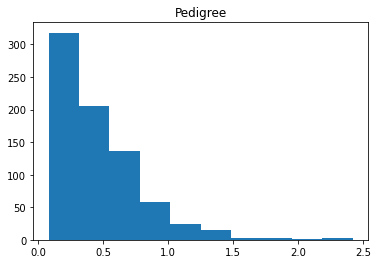

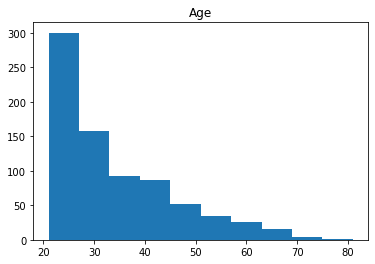

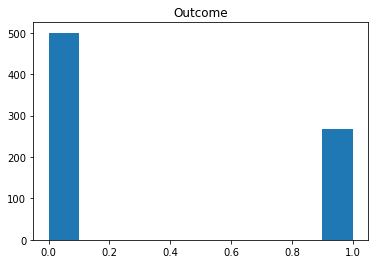

In [47]:
## Histograms for all columns
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

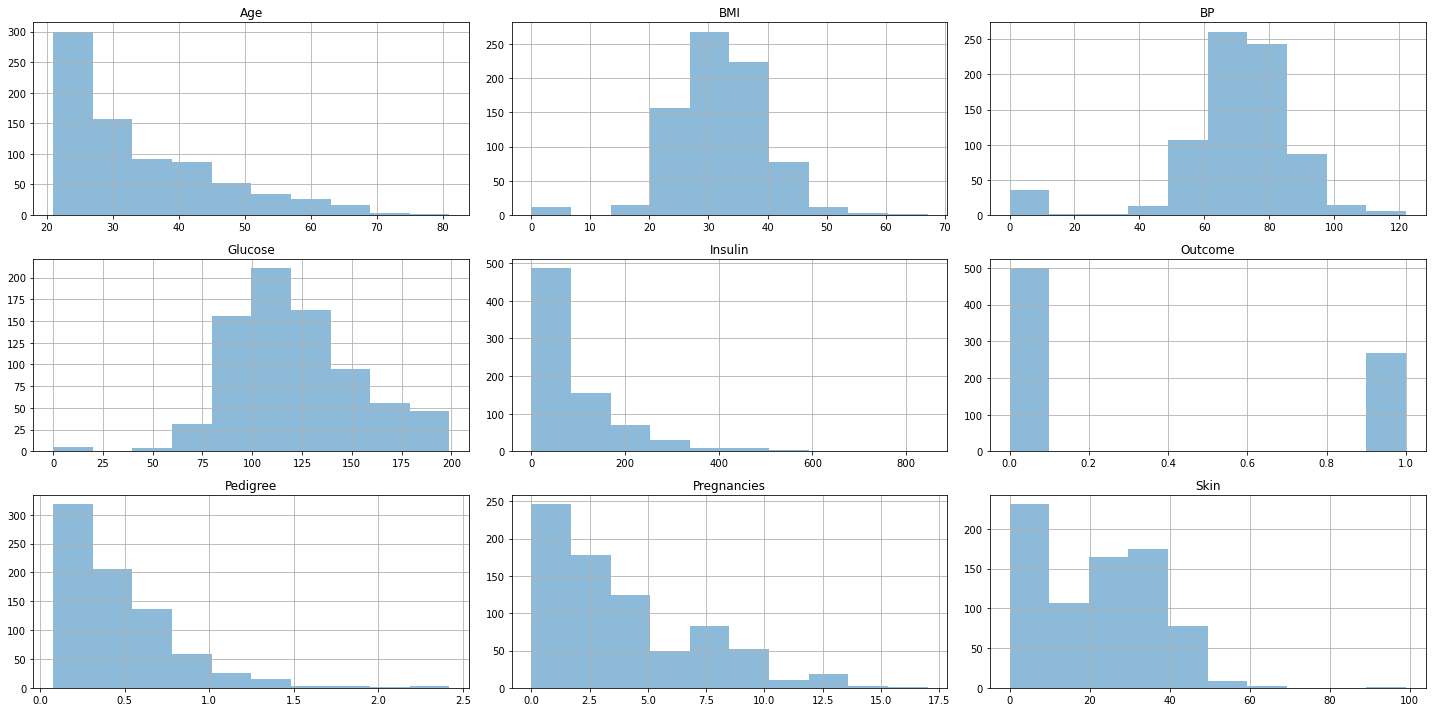

In [44]:
# Generate Visualization
# Histograms
df.hist(alpha = 0.5, figsize=(20, 10))
plt.tight_layout()
plt.show()

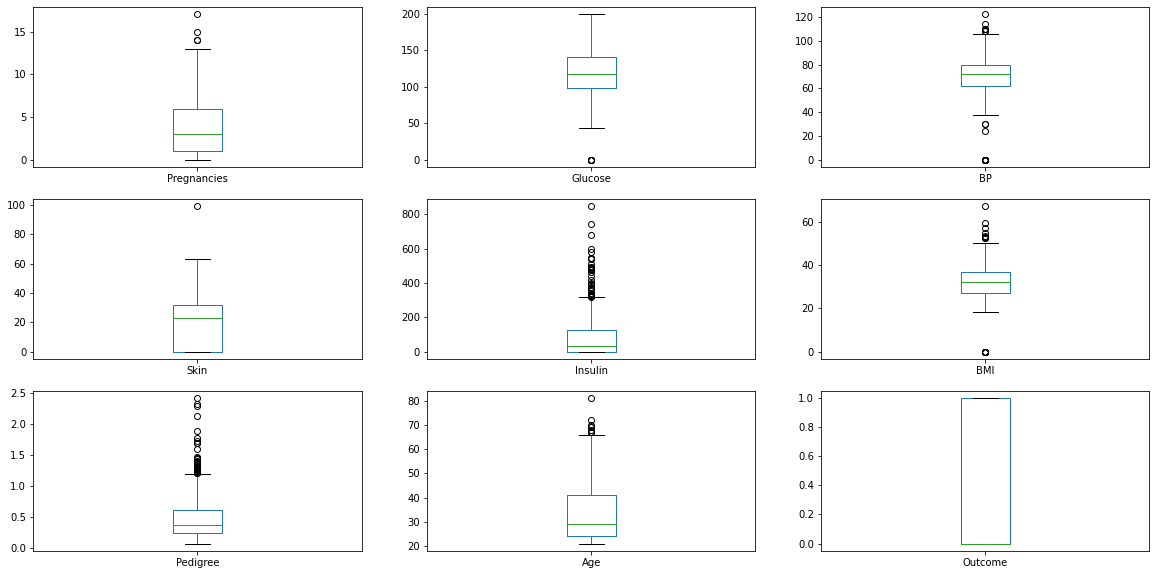

In [46]:
# Box And Whisker Plot
df.plot(figsize = (20, 10), kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

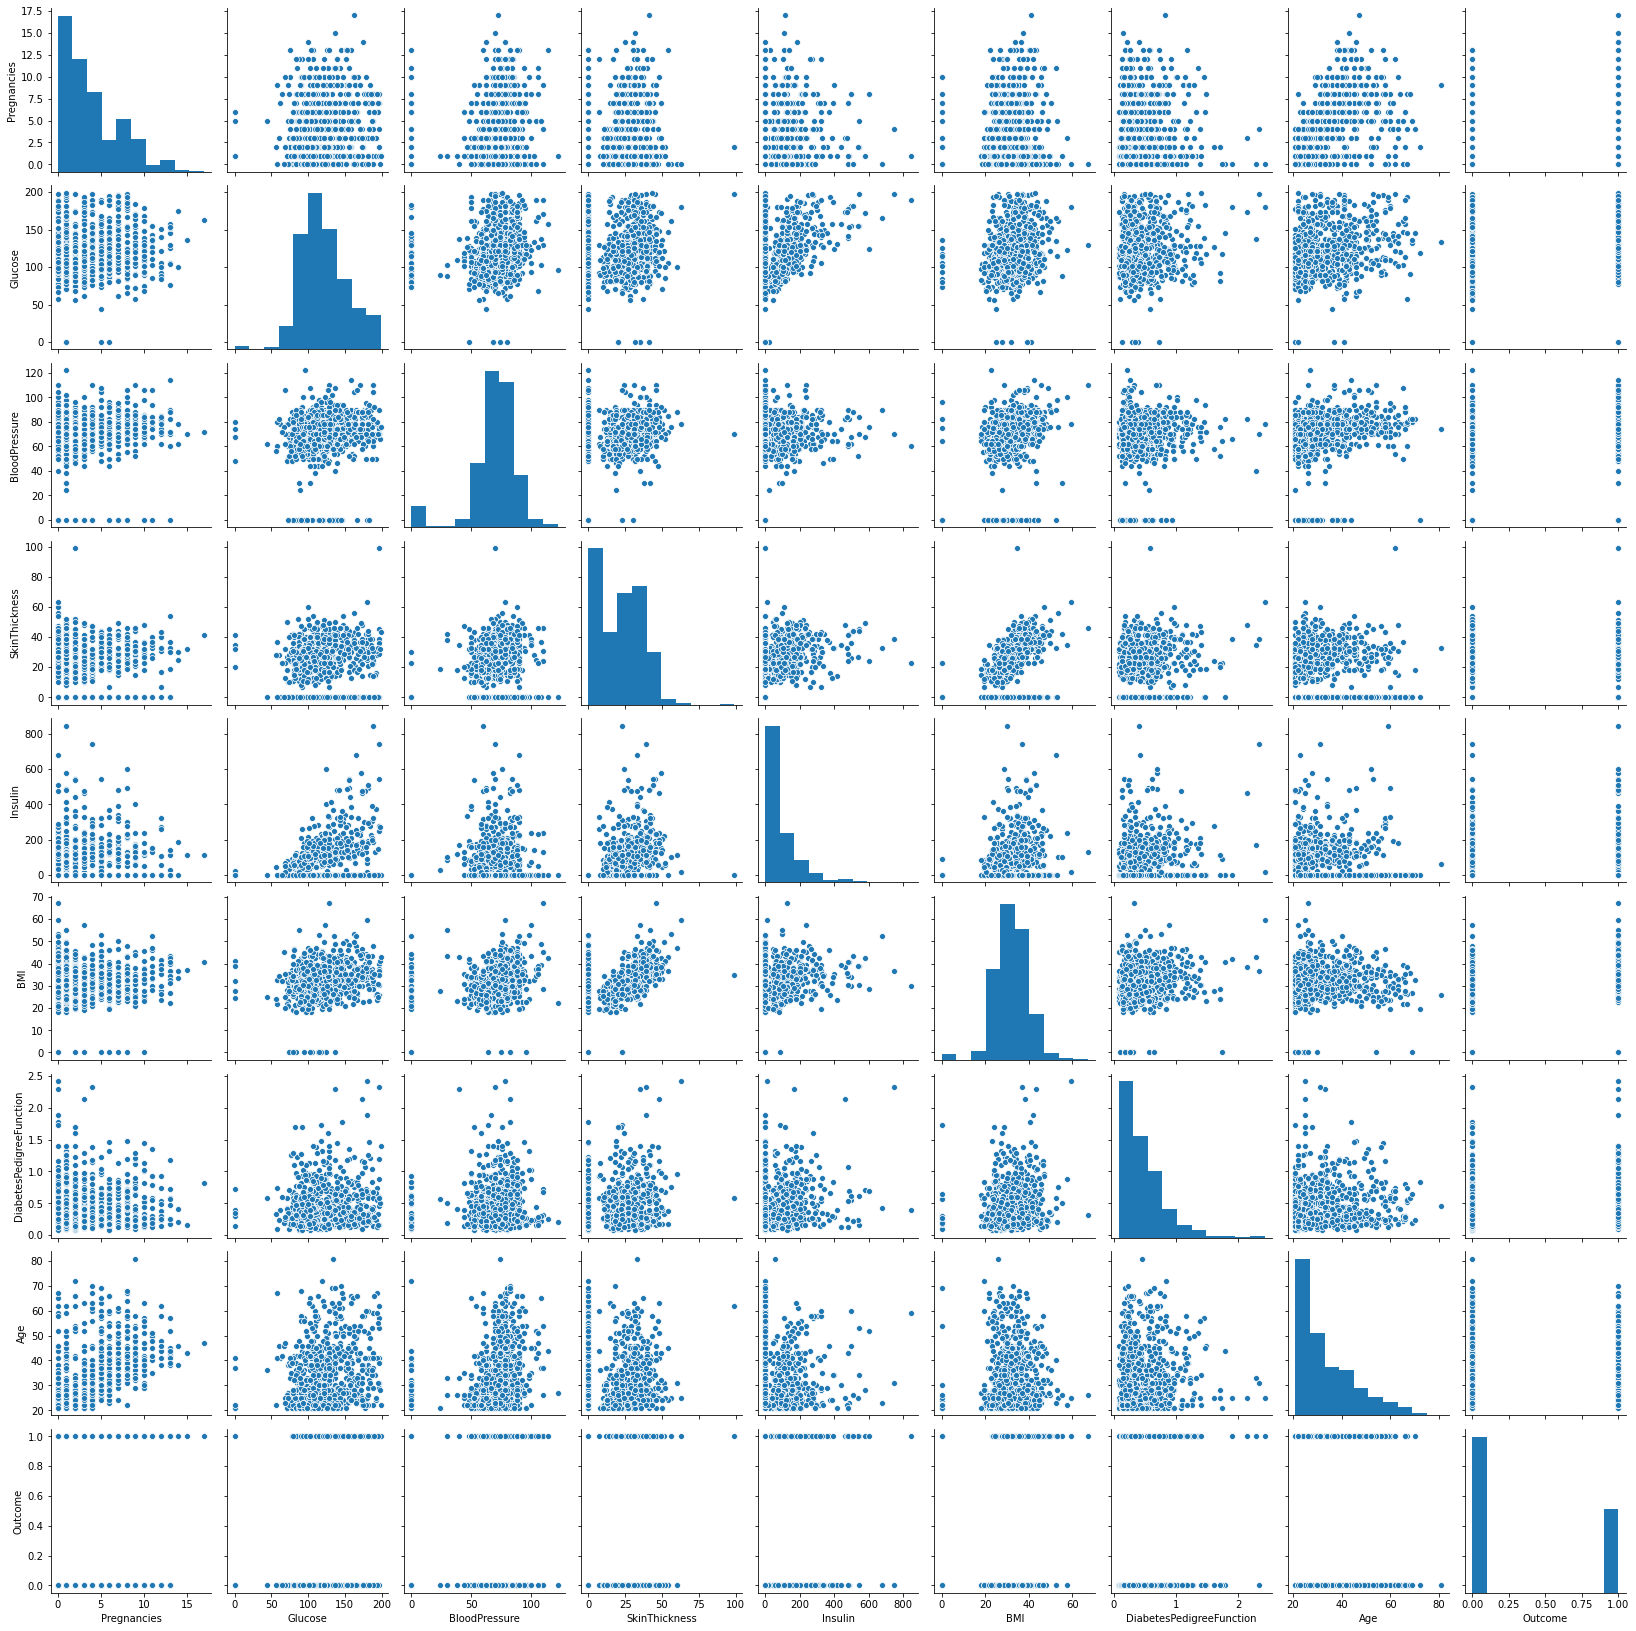

In [8]:
# Pair Plot
sns.pairplot(df)
plt.show()

             Pregnancies   Glucose        BP      Skin   Insulin       BMI  \
Pregnancies     1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683   
Glucose         0.129459  1.000000  0.152590  0.057328  0.331357  0.221071   
BP              0.141282  0.152590  1.000000  0.207371  0.088933  0.281805   
Skin           -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573   
Insulin        -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859   
BMI             0.017683  0.221071  0.281805  0.392573  0.197859  1.000000   
Pedigree       -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647   
Age             0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242   
Outcome         0.221898  0.466581  0.065068  0.074752  0.130548  0.292695   

             Pedigree       Age   Outcome  
Pregnancies -0.033523  0.544341  0.221898  
Glucose      0.137337  0.263514  0.466581  
BP           0.041265  0.239528  0.065068  
Skin         0.183928 -0.113970  0.074752  

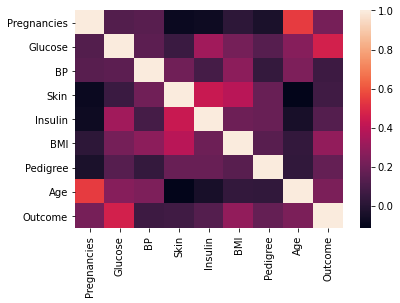

In [48]:
## Correlation
print(df.corr())
sns.heatmap(df.corr())

In [49]:
# Compare diabetes outcome to the rest of the features
pd.pivot_table(df, index = 'Outcome', values = ['Pregnancies','Glucose','BP','Skin',
                                                'Insulin','BMI','Pedigree', 'Age'])

,Age,BMI,BP,Glucose,Insulin,Pedigree,Pregnancies,Skin
Outcome,,,,,,,,
0,31.190000,30.304200,68.184000,109.980000,68.792000,0.429734,3.298000,19.664000
1,37.067164,35.142537,70.824627,141.257463,100.335821,0.550500,4.865672,22.164179


In [94]:
# Split into labels and features
# outcome is the label and the rest of the data are the features
feature_cols = ['Pregnancies','Glucose','BP','Skin','Insulin','BMI','Pedigree', 'Age']
x = df[feature_cols]
y = df.Outcome

x.head(10)

,Pregnancies,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [95]:
# Train/Test The Dataset using the 80/20 sample
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.3, random_state = 1)

In [96]:
# Training dataset shape
x_train.shape

(537, 8)

In [97]:
# Training dataset 
x_train.head()

,Pregnancies,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


In [98]:
# Create a decision tree, classifier and predict the respose for the test dataset
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [99]:
# Verify Model Accuracy 
# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7056277056277056


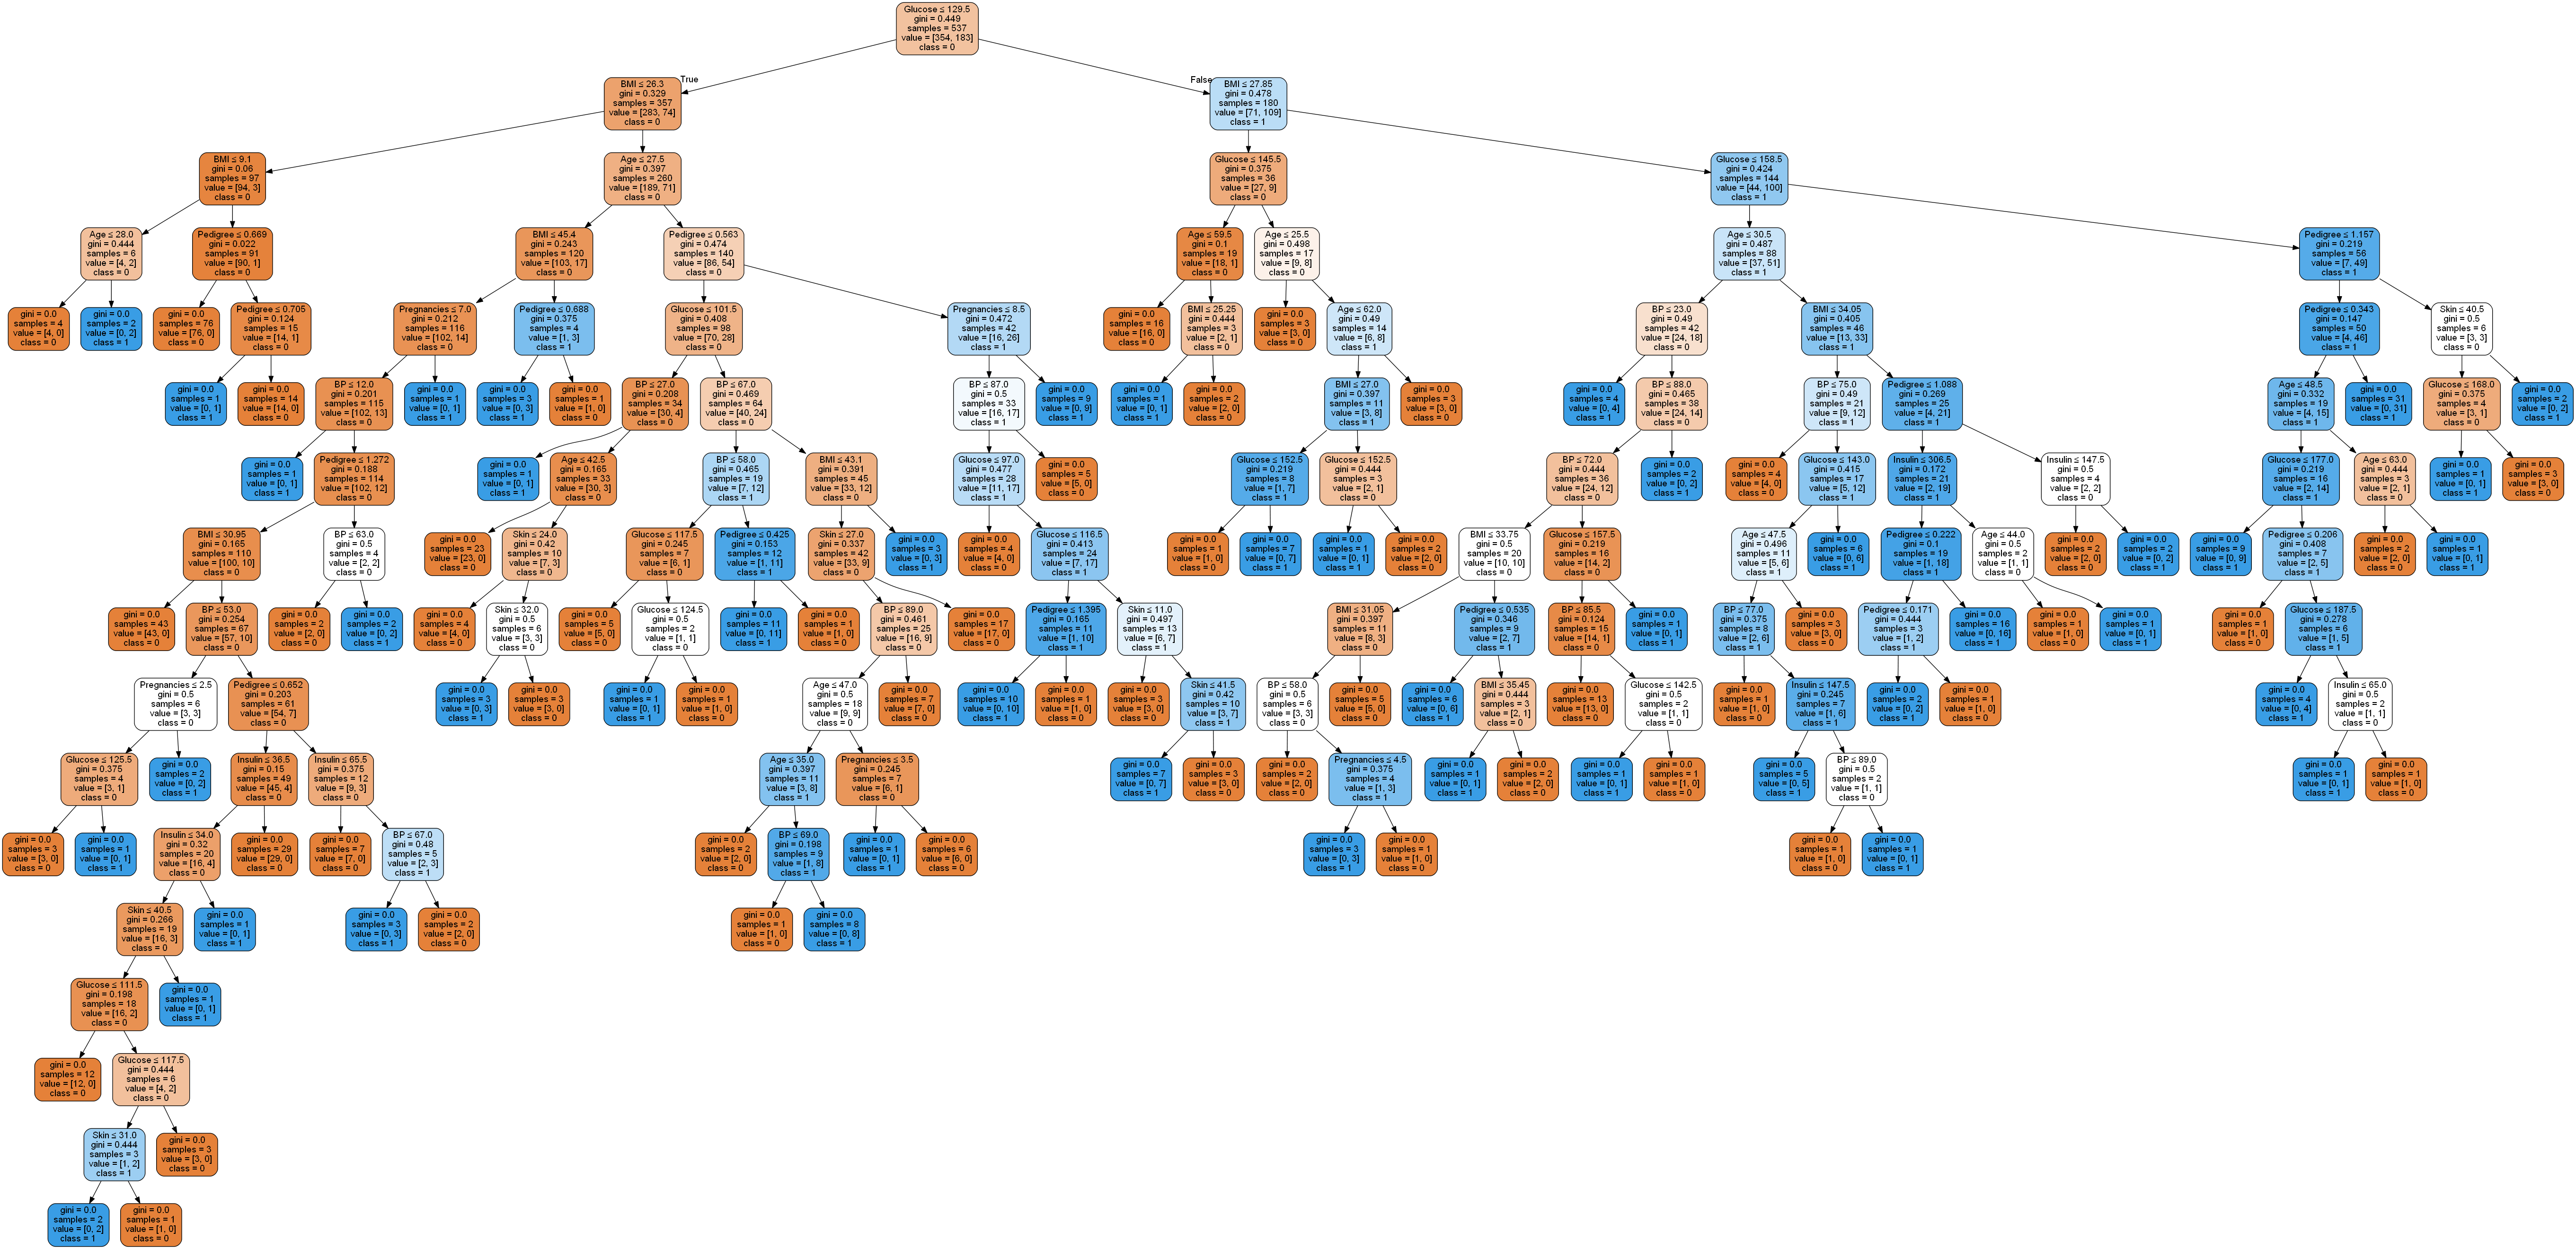

In [101]:
# Visualize the decision tree
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data,  
                filled = True, rounded = True,
                special_characters = True,feature_names = feature_cols, class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [102]:
# Optimizing the decision tree
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(x_test)

# Verify Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


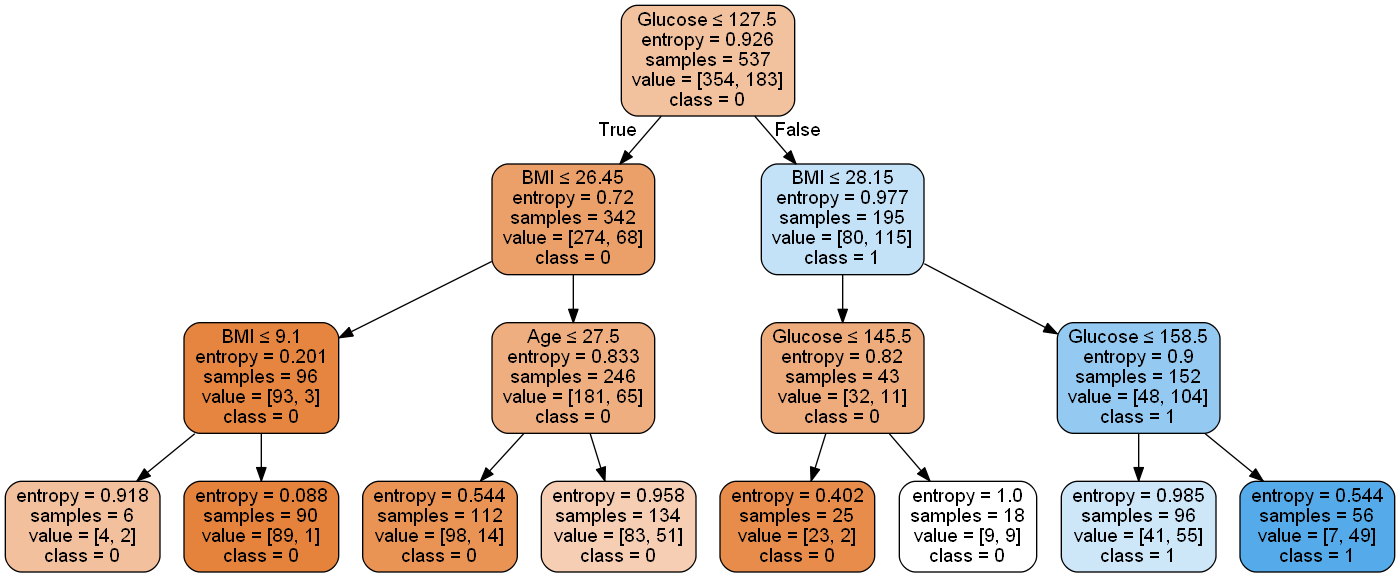

In [103]:
# Visualize the decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

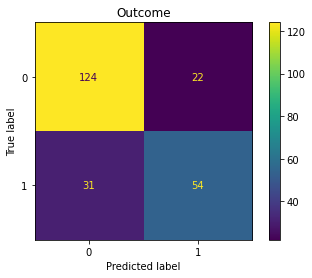

In [107]:
plot_confusion_matrix(clf, x_test, y_test)  
plt.title('Outcome')
plt.show() 